In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:

load_data = pd.read_excel(r"C:\Users\User\Downloads\Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [5]:
type(load_data)

pandas.core.frame.DataFrame

In [9]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)
data.head()


,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [10]:
data.shape

(2183, 1)

In [11]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [14]:
data.corr()

,load
load,1.0


In [15]:
data.isnull().sum()

load    0
dtype: int64

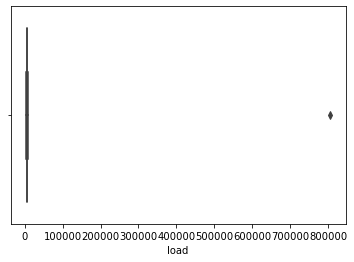

In [16]:
sns.boxplot(x=data['load'])

In [17]:

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


In [18]:
data.iloc[928,0] = data.iloc[927,0]

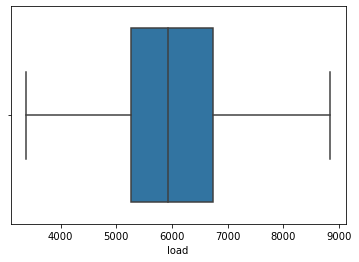

In [19]:
sns.boxplot(x=data['load'])

In [20]:
data_x = []
data_y = []
for i in range(0,len(data)-24):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+24,0])

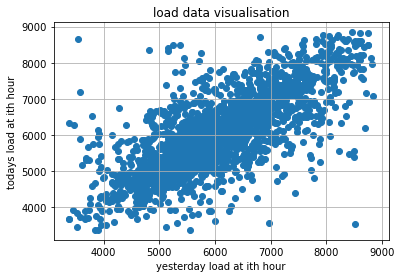

In [21]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()

In [22]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
8841.66948
8841.66948


In [23]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [24]:

data_norm = []
for i in range(len(data)-24):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472
...,...,...
2154,0.231719,0.228524
2155,0.445808,0.217797
2156,0.684146,0.246298
2157,0.514679,0.324384


In [25]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [26]:
data_norm.head()

,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472


In [27]:
data_x = np.array(data_train[0])

In [28]:
data_y = np.array(data_train[1])

In [29]:
len(data_x)

1943

In [30]:

len(data_test)

216

In [31]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train)
error = []
vm = 0
vc = 0
moment = 0.9

In [32]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )
    # print("derivatives at ",i,"   ",der_m,der_c)

    # calculating change in m and c
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    # print("changes at ",i,vm,vc)

    #updating m and c
    m = m + vm
    c = c + vc
    # print("values at",i,m,c)

  err=0
  for i in range(0,len(data_train)):
    err+=((data_y[i] - (m * data_x[i]) - c))**2
  err = (1/(2*len(data_train))) * err
  error.append(err)
    #incrementing no of iterations
  iter = iter + 1
print(m,c)

0.8074882914642395 0.06169547087191402


In [33]:

len(error)

100

In [34]:
iters = np.arange(epochs)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [37]:
mse_train = mean_squared_error(data_y,pred)

In [38]:
data_test

,0,1
202,0.467062,0.563465
755,0.488831,0.391487
569,0.731220,0.835639
65,0.756326,0.866166
2000,0.652763,0.588343
...,...,...
561,0.483296,0.577444
207,0.857493,0.917977
2103,0.353970,0.036804
1785,0.583721,0.591481


In [39]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

In [40]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.018170979486540593
Testing data mean squared error: 0.01903146198838366


In [41]:

print("model parameter:",m,c)

model parameter: 0.8074882914642395 0.06169547087191402


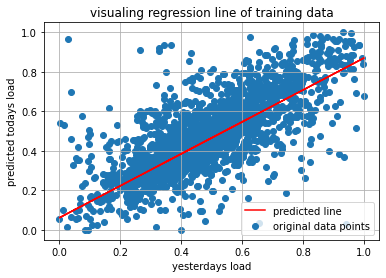

In [42]:
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

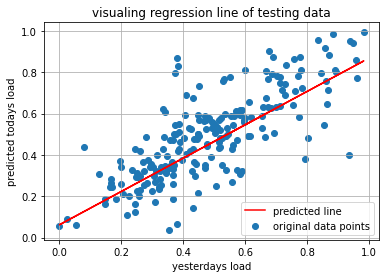

In [43]:

plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

In [44]:
input_load = float(input("enter yesterday load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5078
predicted load for this hour is :  5087.803239120804
